In [62]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json
from typing import Dict


In [63]:
QUIZ_ENDPOINT = "https://jsonkeeper.com/b/LLQT"
QUIZ_SUBMISSION_DATA = "https://api.jsonserve.com/rJvd7g"
API_ENDPOINT = "https://api.jsonserve.com/XgAgFJ"


In [64]:
def fetch_data(endpoint: str) -> Dict:
    try:
        response = requests.get(endpoint, verify=False)
        if response.status_code == 200:
            print(f"Data fetched successfully from {endpoint}")
            return response.json()
        else:
            print(f"Failed to fetch data from {endpoint}. Status code: {response.status_code}")
            return {}
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return {}

current_quiz_data = fetch_data(QUIZ_ENDPOINT)
quiz_submission_data = fetch_data(QUIZ_SUBMISSION_DATA)
historical_data = fetch_data(API_ENDPOINT)

Data fetched successfully from https://jsonkeeper.com/b/LLQT
Data fetched successfully from https://api.jsonserve.com/rJvd7g
Data fetched successfully from https://api.jsonserve.com/XgAgFJ


In [74]:
def analyze_current_quiz(data: Dict):
    questions = pd.DataFrame(data.get("quiz", {}).get("questions", []))
    if "options" in questions.columns:
        questions["is_correct"] = questions["options"].apply(
            lambda opts: any(opt.get("is_correct", False) for opt in opts)
        )
        accuracy = questions["is_correct"].mean()
        print(f"Overall Accuracy: {accuracy:.2%}")
    if "topic" in questions.columns:
        accuracy_by_topic = questions.groupby("topic")["is_correct"].mean()
        print("Accuracy by Topic:")
        print(accuracy_by_topic)
        accuracy_by_topic.plot(kind="bar", title="Current Quiz Accuracy by Topic")
        plt.ylabel("Accuracy")
        plt.show()

In [75]:
def analyze_historical_data(data):
    quizzes = pd.DataFrame(data)
    quizzes["topic"] = quizzes["quiz"].apply(lambda x: x.get("topic", "Unknown") if isinstance(x, dict) else "Unknown")
    avg_score_by_topic = quizzes.groupby("topic")["score"].mean()
    print("\nAverage Score by Topic:")
    print(avg_score_by_topic)
    if "submitted_at" in quizzes.columns:
        quizzes["submitted_at"] = pd.to_datetime(quizzes["submitted_at"])
        quizzes.set_index("submitted_at", inplace=True)
        score_trends = quizzes.resample('D')["score"].mean()
        print("\nScore Trends Over Time:")
        print(score_trends)
        score_trends.plot(title="Score Trends Over Time", ylabel="Score", xlabel="Date")
        plt.show()
    return avg_score_by_topic

In [76]:
def generate_student_persona(data):
    quizzes = pd.DataFrame(data)
    quizzes["accuracy_numeric"] = quizzes["accuracy"].str.replace('%', '').astype(float) / 100
    avg_accuracy = quizzes["accuracy_numeric"].mean()
    avg_speed = quizzes["speed"].astype(float).mean()
    if avg_accuracy > 0.9 and avg_speed > 90:
        persona = "Strategic Learner"
    elif avg_accuracy > 0.9:
        persona = "Accuracy-Focused"
    elif avg_speed > 90:
        persona = "Speed-Focused"
    else:
        persona = "Balanced Learner"
    print(f"Student Persona: {persona}")
    return persona

In [81]:
def generate_complete_recommendations(current_data, historical_data):
    current_topics = pd.DataFrame(current_data.get("quiz", {}).get("questions", []))
    weak_topics = pd.Series(dtype=float)
    if "topic" in current_topics.columns and "is_correct" in current_topics.columns:
        weak_topics = current_topics.groupby("topic")["is_correct"].mean()
        weak_topics = weak_topics[weak_topics < 0.5]
    avg_score_by_topic = analyze_historical_data(historical_data)
    historical_weak_topics = avg_score_by_topic[avg_score_by_topic < 50].index.tolist()
    recommendations = {
        "current_weak_topics": weak_topics.index.tolist(),
        "historical_weak_topics": historical_weak_topics,
        "practice_difficulty": "medium",
        "suggested_questions": 10,
    }
    print("Complete Recommendations:")
    print(json.dumps(recommendations, indent=2))


Overall Accuracy: 100.00%
Accuracy by Topic:
topic
structural organisation in animals     1.0
Name: is_correct, dtype: float64


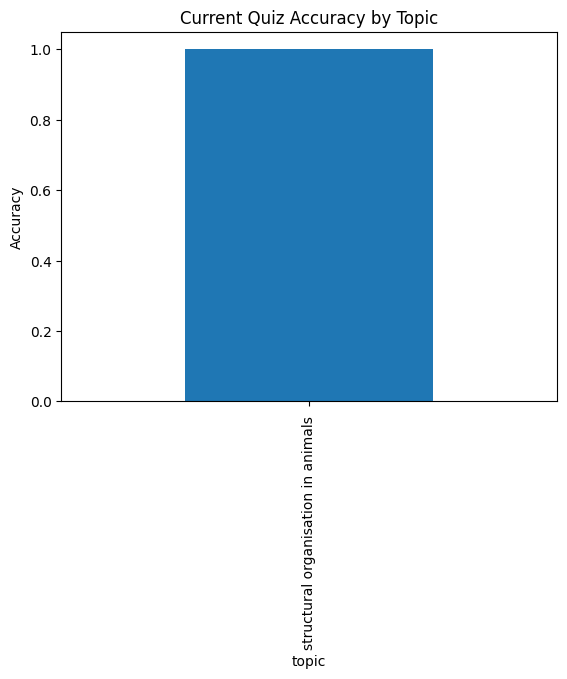


Average Score by Topic:
topic
Body Fluids and Circulation                  86.666667
Body Fluids and Circulation                  54.666667
Human Reproduction                           40.000000
Reproductive Health                          52.000000
Respiration and Gas Exchange                 24.000000
human health and disease                    112.000000
microbes in human welfare                    76.000000
principles of inheritance and variation      12.000000
reproductive health                          52.000000
Name: score, dtype: float64

Score Trends Over Time:
submitted_at
2024-12-11 00:00:00+05:30     24.000000
2024-12-12 00:00:00+05:30           NaN
2024-12-13 00:00:00+05:30           NaN
2024-12-14 00:00:00+05:30           NaN
2024-12-15 00:00:00+05:30           NaN
2024-12-16 00:00:00+05:30           NaN
2024-12-17 00:00:00+05:30           NaN
2024-12-18 00:00:00+05:30           NaN
2024-12-19 00:00:00+05:30           NaN
2024-12-20 00:00:00+05:30           NaN
2024-12-

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


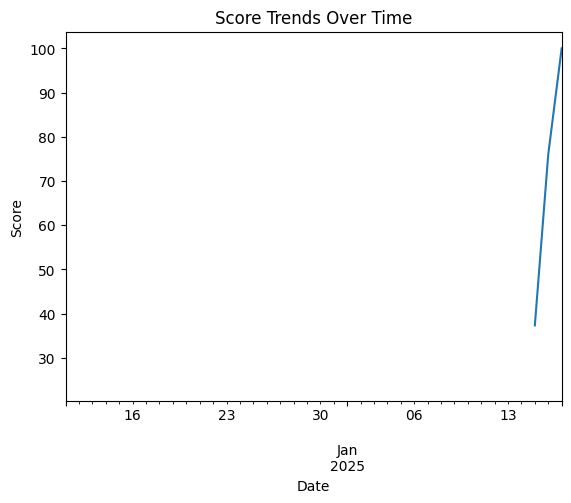

Student Persona: Speed-Focused

Average Score by Topic:
topic
Body Fluids and Circulation                  86.666667
Body Fluids and Circulation                  54.666667
Human Reproduction                           40.000000
Reproductive Health                          52.000000
Respiration and Gas Exchange                 24.000000
human health and disease                    112.000000
microbes in human welfare                    76.000000
principles of inheritance and variation      12.000000
reproductive health                          52.000000
Name: score, dtype: float64

Score Trends Over Time:
submitted_at
2024-12-11 00:00:00+05:30     24.000000
2024-12-12 00:00:00+05:30           NaN
2024-12-13 00:00:00+05:30           NaN
2024-12-14 00:00:00+05:30           NaN
2024-12-15 00:00:00+05:30           NaN
2024-12-16 00:00:00+05:30           NaN
2024-12-17 00:00:00+05:30           NaN
2024-12-18 00:00:00+05:30           NaN
2024-12-19 00:00:00+05:30           NaN
2024-12-20 00:00:

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


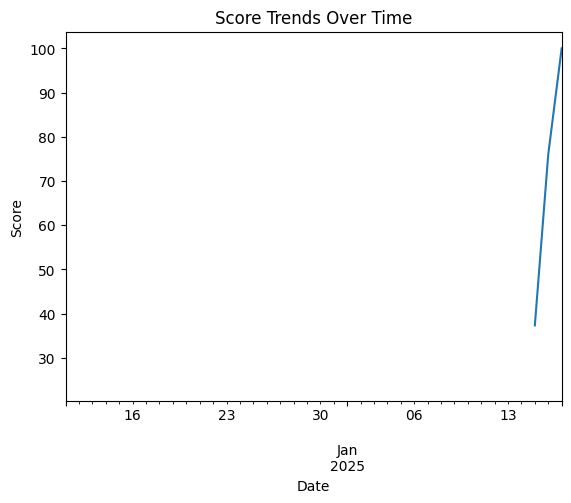

Complete Recommendations:
{
  "current_weak_topics": [],
  "historical_weak_topics": [
    "Human Reproduction",
    "Respiration and Gas Exchange",
    "principles of inheritance and variation "
  ],
  "practice_difficulty": "medium",
  "suggested_questions": 10
}


In [82]:
analyze_current_quiz(current_quiz_data)
analyze_historical_data(historical_data)
generate_student_persona(historical_data)
generate_complete_recommendations(current_quiz_data, historical_data)